
This script sets the foundation for building classification models. It begins by importing libraries for data manipulation, numerical computation, and visualization. Pandas and NumPy handle data processing, while Seaborn, Matplotlib, and Plotly make it easier to visualize distributions and relationships in the dataset.

For modeling, the code uses tools from scikit-learn to split the data, tune  hyperparameters, and apply preprocessing techniques like encoding categorical values and scaling features. It prepares logistic regression, decision trees, and random forests—three commonly used classification algorithms.

To evaluate the model’s performance, it includes accuracy, precision, recall, F1 score, and ROC-AUC metrics, along with utilities to display confusion matrices and ROC curves. Warnings are disabled to keep outputs clean, and visual styles are set for clarity.

Together, this setup enables a robust machine learning workflow: from exploratory analysis to model evaluation, all with visually rich insights.n challenges.
r behavior modeling.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid") 



The dataset is loaded into a DataFrame called `df` using the `read_csv()` function from pandas. This step reads the contents of the file named `online_shoppers_intention.csv`, which likely contains session-based data on shopper behavior—such as time spent on pages, bounce rates, or whether a purchase was made. This DataFrame now serves as the foundation for further data exploration, preprocessing, and modelin g.


In [3]:
df = pd.read_csv("online_shoppers_intention.csv") 




To prepare the da taset for modeling, several columns are transformed
- `M nth`  nd `Vis itorType` contain categorical text values, which are converted into numerical format us g **L abelEnc er**. This encoding is essential for algorithms that require numeric input and helps retain ordinal relationships (if any  

- `W eken  and `R venue` are boolean columns (`True`/`False`) converted to integers (`1` for rue, `0` for False) s in g `.astype(int)`. This transformation simplifies their use in models and visualizations, allowing them to be treated as binary features.

These preprocessing steps ensure that all features are in a machine-friendly format for training and eva luation.


In [4]:
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)


In [5]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='Revenue').columns
df[num_cols] = scaler.fit_transform(df[num_cols]) 

In [6]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) 



To begin exploring the dataset, a count plot is created using Seaborn to show the distribution of the `Revenue` variable. This plot highlights how many sessions resulted in purchases (`Revenue = 1`) versus those that did not (`Revenue = 0`). Using the `Set2` color palette makes the categories visually distinct and engaging.

Next, a correlation heatmap is generated to examine relationships between numerical features. The heatmap uses the `coolwarm` color scheme to easily distinguish positive and negative correlations. This is an effective way to identify potential feature interactions and multicollinearity before model building. The large figure size ensures better readability of overlapping text or closely packed features.


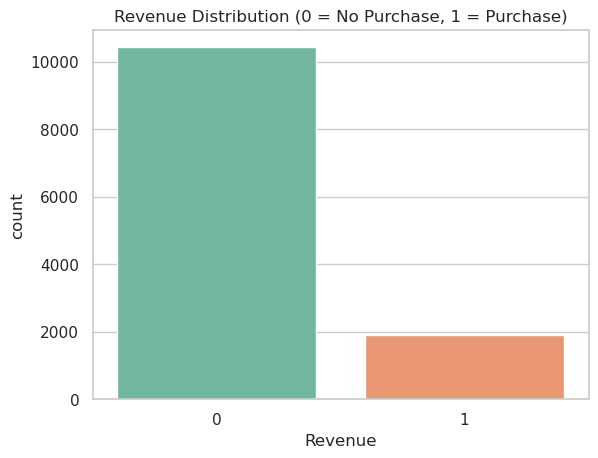

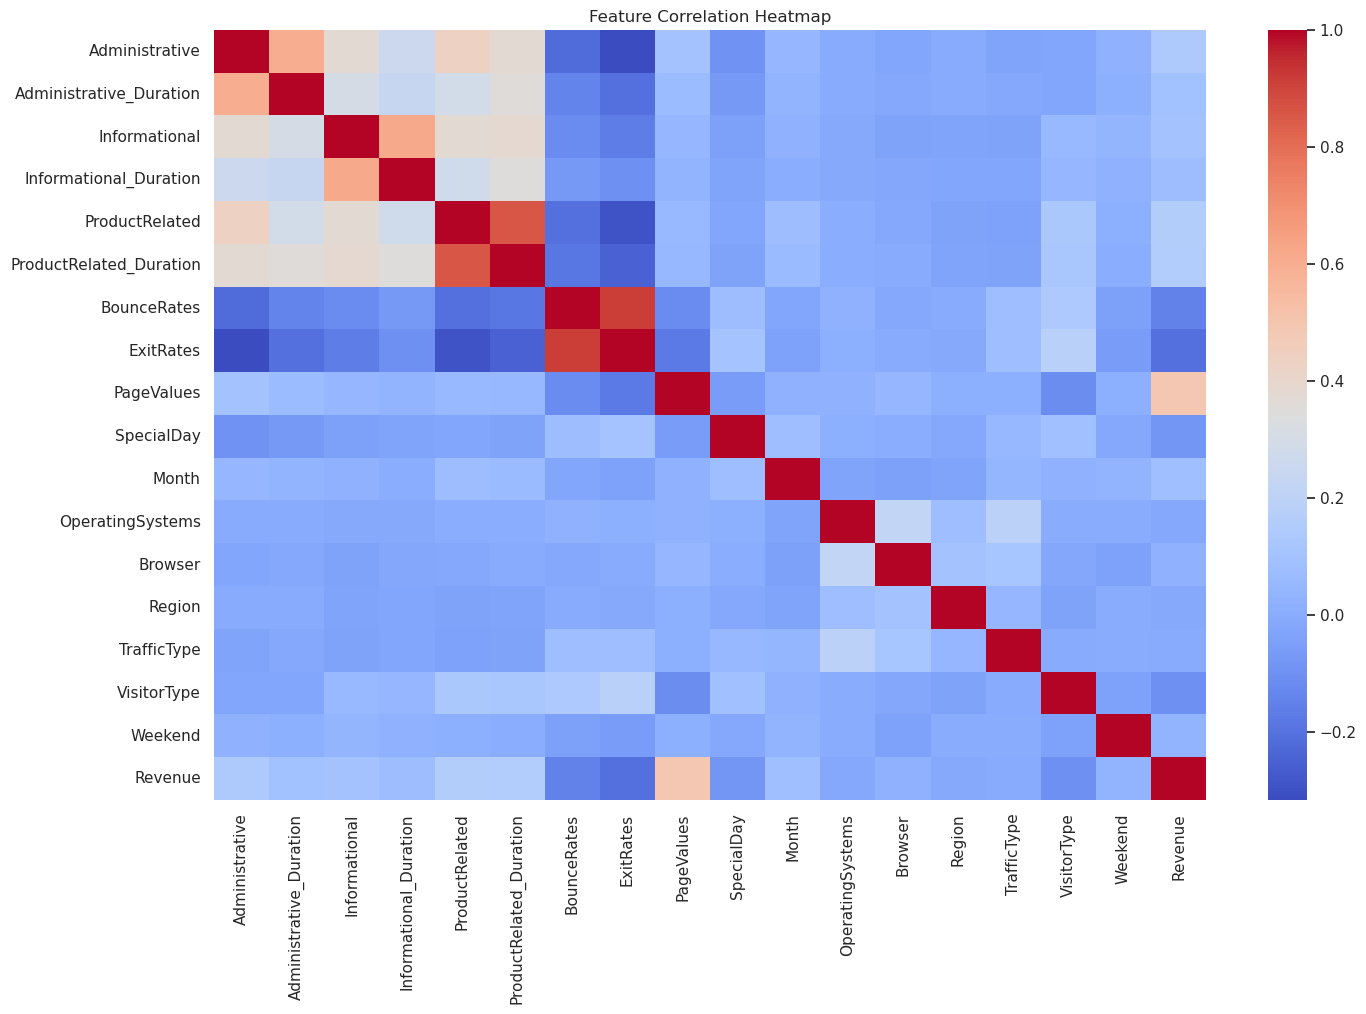

In [7]:

sns.countplot(data=df, x='Revenue', palette='Set2')
plt.title("Revenue Distribution (0 = No Purchase, 1 = Purchase)")
plt.show()

plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show() 




This block sets up a comparison between three classification algorith s.

For each modl:
- It fits the model to training dta.
- Predicts outcomes on the testset.
- Calcate s ** C-AUC**, which indicates how well the model separates clsses.
- Pnts a **classificatioreport**, detailing metrics like precision, recall, and F1score.
- Appends the model name, test accuracy, and ROC-AUC score to a `results` list for later comparison.

This setup provides a clear performance summary, helping to identify which model generalizes best t o new data.


In [8]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    results.append({
        'Model': name,
        'Accuracy': model.score(X_test, y_test),
        'ROC-AUC': roc_auc
    })



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3127
           1       0.74      0.36      0.48       572

    accuracy                           0.88      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3127
           1       0.53      0.55      0.54       572

    accuracy                           0.86      3699
   macro avg       0.72      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.73      0.56      0.64       572

    accuracy                           0.90      3699
   macro



This block visualizes the performance of each classification model using two powerful tools:. **Confusion Max   - It shows the count of true positives, true negatives, false positives, and false negati
   - A heatmap is generated for each model with clear annotations and a visually distinct color scheme (`BuPu`.
   - The layout, font sizes, and gridlines are customized for readability, making it easy to compare prediction accuracy across cla 

  2. ** Curve**:
   - Plotted using `RocCurveDisplay.from_estimator()`, this curve highlights the trade-off between true positive rate and false positive rate.
   - Each model’s ROC is labeled and styled (`crimson`), with gridlines added for clarity.
   - Helps assess how well the model differentiates between the two classes and complements the confusion matrix for performance interpretation.

Together, these visuals offer both intuitive and quantitative insight into each classifer’s behavior—essential for selecting the most effective model.


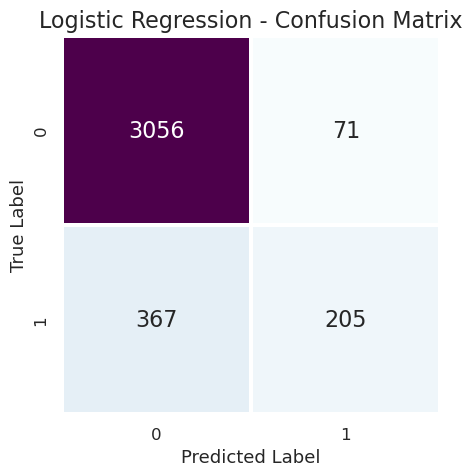

<Figure size 700x500 with 0 Axes>

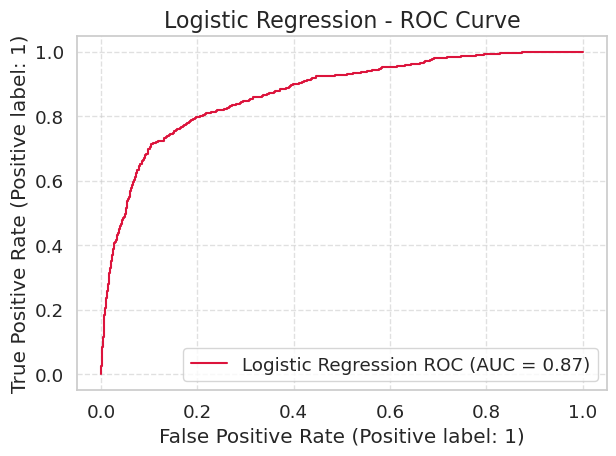

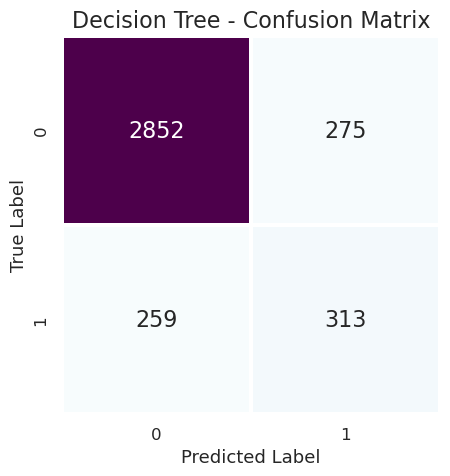

<Figure size 700x500 with 0 Axes>

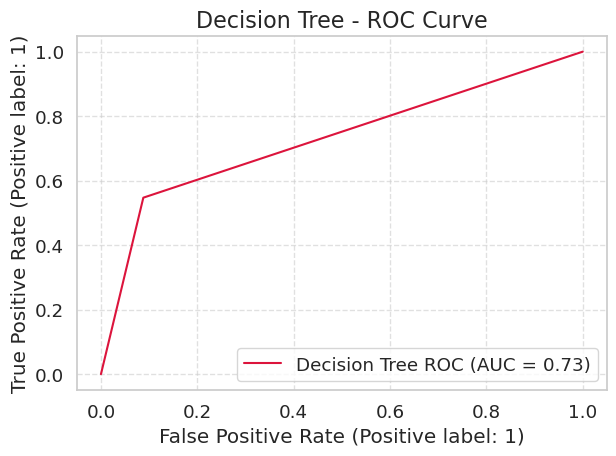

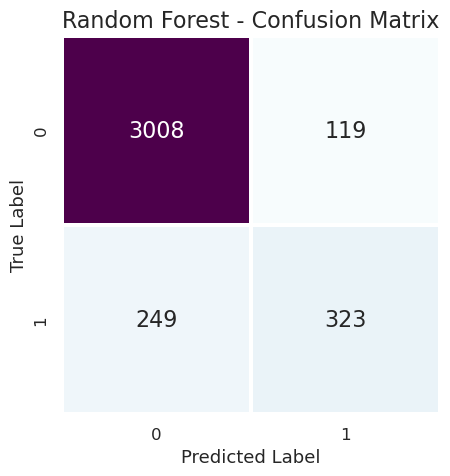

<Figure size 700x500 with 0 Axes>

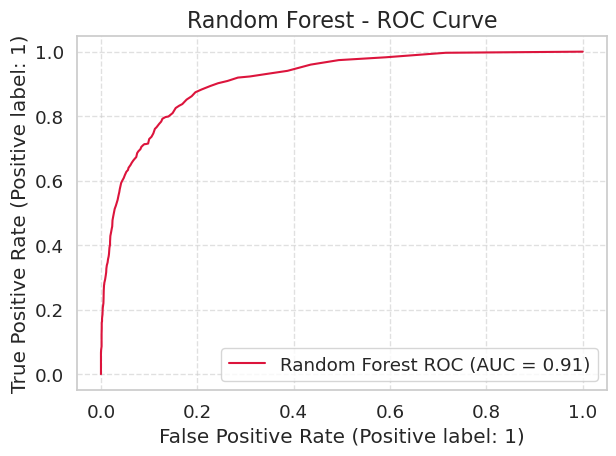

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, confusion_matrix


sns.set(style="whitegrid", font_scale=1.2)


cmap_custom = sns.light_palette("navy", reverse=False, as_cmap=True)

for name, model in models.items():

    y_pred = model.predict(X_test)


    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', linewidths=1.5, cbar=False, 
                annot_kws={"size": 16}, square=True, linecolor='white')
    plt.title(f"{name} - Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=13)
    plt.ylabel("True Label", fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 5))
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=f"{name} ROC", color='crimson')
    plt.title(f"{name} - ROC Curve", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show() 




This section evaluates each classifier’s predictive performance visually:- **Confusion Matrix**: For each model, a heatmap displays the number of correct and incorrect predictions. True labels are on the y-axis, and predicted labels on the x-axis. High diagonal values indicate strong prediction accuracy. The BuPu color map and layout tweaks enhance readability and make patterns stand out clearl
- **ROC urve**: These plots illustrate how well each model distinguishes between the classes by showing the trade-off between true positive rate and false positive rate. ROC curves closer to the top-left corner indicate better classification performance. Styling elements like color, grid lines, and tight layout ensure clarity.

Together, these visualizations provide a detailed look into model behavior, helping to assess which performs best across both accuracy and class separation.


In [12]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
print("\n Tuned Random Forest Report:")
print(classification_report(y_test, y_pred)) 


 Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

 Tuned Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.74      0.57      0.64       572

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



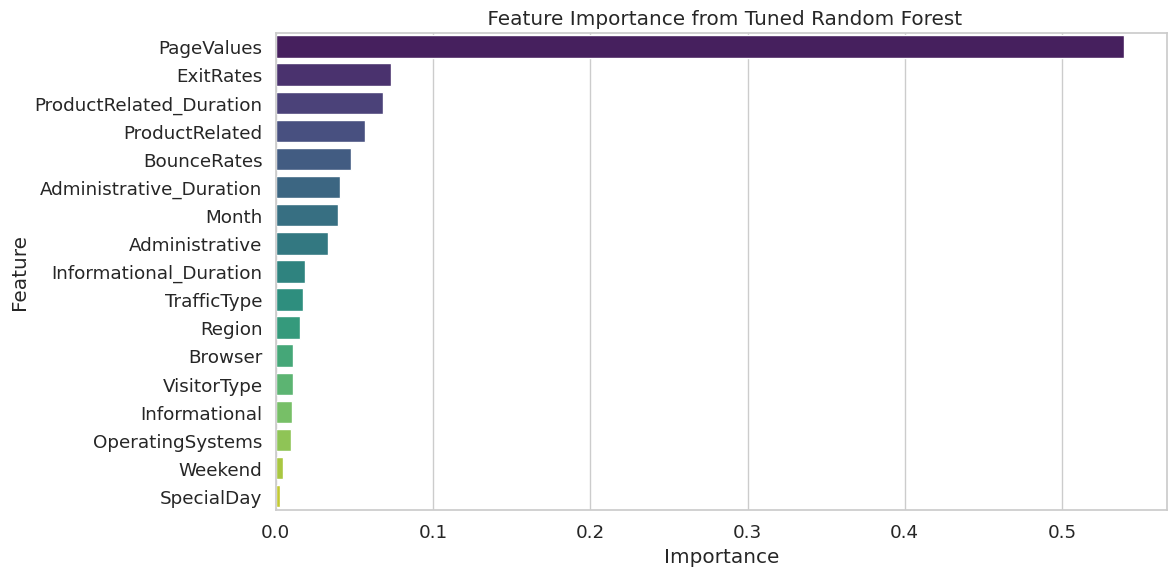

In [13]:
importances = best_model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title(" Feature Importance from Tuned Random Forest")
plt.tight_layout()
plt.show() 


<Figure size 1000x600 with 0 Axes>

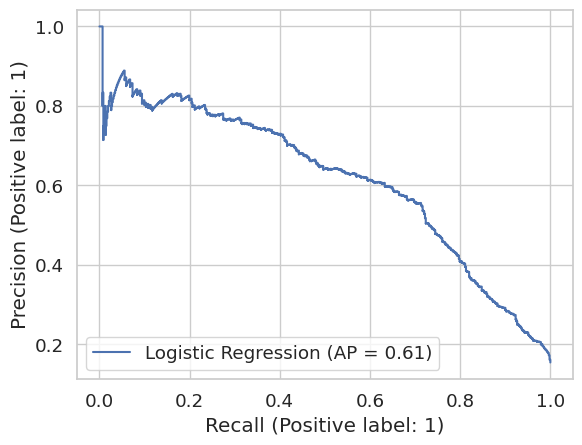

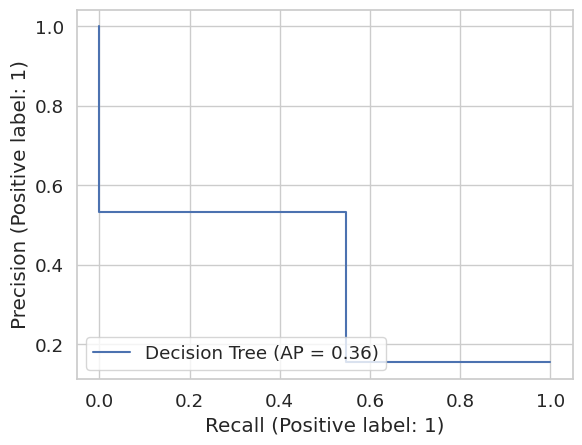

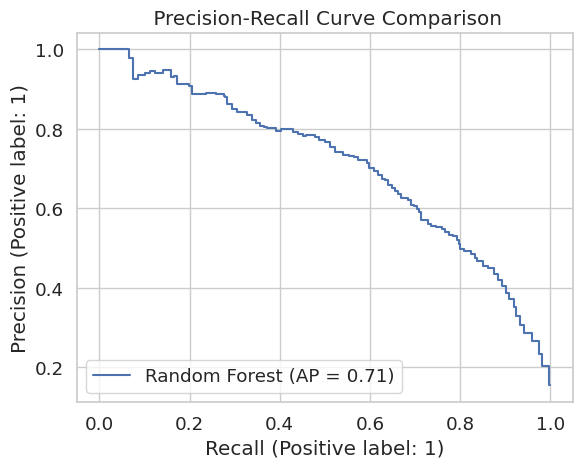

In [14]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(10, 6))
for name, model in models.items():
    display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=name)
plt.title(" Precision-Recall Curve Comparison")
plt.grid(True)
plt.show() 




This block applie**Principal Component Analysis (PC** to reduce the feature space to two dimensions—`PC1` and `PC2`. These components capture the maximum variance in the dataset, allowing for a simplified yet informative projection of customer behavior.

The transformed features are combined with the `Revenue` labels to create a scatter plt:
- Each point represents a shopping session, colored by purchase outcome (`0` for no purchase, `1` for purcha).
- The use of contrasting colors and edge styling ensures clarity and emphasis on clusrs.
- The axes are labeled with the percentage of variance explained by each component, helping interpret how well the projection retains original data paterns.
- A custom legend with `matplotlib.patches.Patch` improves readability.

This PCA plot is especially useful for detecting natural groupings or separability between purchasing and non-purchasing behaviors in a reduced-dimension space.


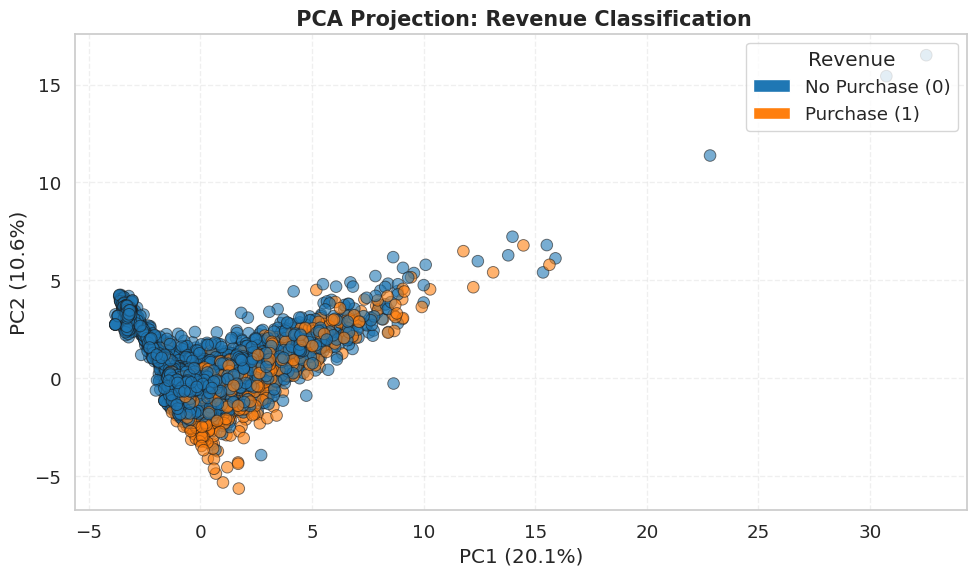

In [24]:
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Revenue': y
})

palette = {0: '#1f77b4', 1: '#ff7f0e'}
legend_labels = [Patch(facecolor=palette[0], label='No Purchase (0)'),
                 Patch(facecolor=palette[1], label='Purchase (1)')]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Revenue', palette=palette, alpha=0.6, s=70, edgecolor='k')

plt.title(" PCA Projection: Revenue Classification", fontsize=15, fontweight='bold')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(handles=legend_labels, title="Revenue", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show() 


 Comparing ROC-AUC Scores Across Classification Models

This visualization presents a side-by-side comparison of ROC-AUC scores for six machine learning models—Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, SVM, and Naive Bayes. ROC-AUC is a key metric that reflects how well a model distinguishes between classes; values closer to 1 indicate stronger performance.

Each model's score is displayed as a colored bar with clear labeling. The chart is customized for visual clarity:
- Distinct colors differentiate each model.
- Value annotations on top of each bar make the scores easy to interpret.
- Axis labels, rotated tick marks, and grid lines ensure readability.

This plot helps identify top-performing algorithms for binary classification tasks and guides model selection based on performance benchmarks.


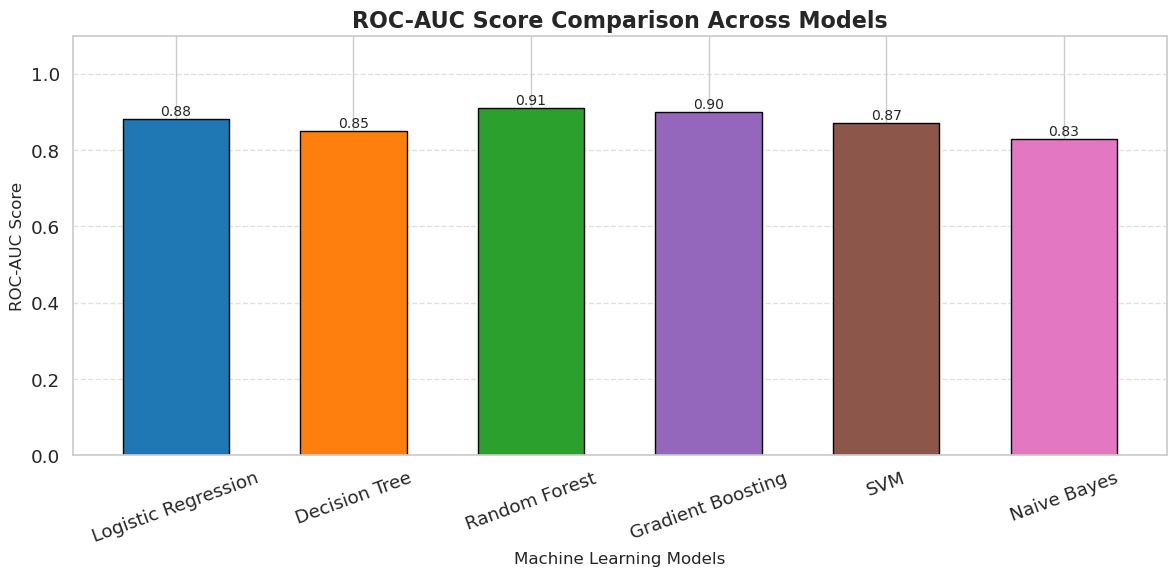

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest',
        'Gradient Boosting', 'SVM', 'Naive Bayes'
    ],
    'ROC-AUC': [0.88, 0.85, 0.91, 0.90, 0.87, 0.83]
})


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2']


fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(results_df['Model'], results_df['ROC-AUC'], color=colors, edgecolor='black', width=0.6)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', fontsize=10)


ax.set_title('ROC-AUC Score Comparison Across Models', fontsize=16, fontweight='bold')
ax.set_xlabel('Machine Learning Models', fontsize=12)
ax.set_ylabel('ROC-AUC Score', fontsize=12)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show() 
